In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplleaflet
import geopandas as geopd
import srtm
import gpxpy
import networkx as nx
import process_gpx_data as gpx_process
import os
import shapely

from matplotlib import rc, cm
viridis = cm.get_cmap('viridis')
magma   = cm.get_cmap('magma')
plasma  = cm.get_cmap('plasma')


import autotrail as AT

m_in_mi = 1609.34
m_in_ft = 0.3048

In [2]:
#
# load the pickled traip map
#
outname = './data/boulder_area_trail_processed'
new_df, nodes, edges = gpx_process.load_trail_df(outname)
TrailMap             = gpx_process.load_graph(outname)
TrailMap.ensure_edge_attributes()

In [4]:
test_coord = (-105.27818, 39.99855) # near start of chataqua

node_index, node_id = TrailMap.nearest_node( test_coord[0], test_coord[1])

In [22]:
dist          = 25.0   * m_in_mi
elev          = 3000.0 * m_in_ft

start_node    = node_id[0]*1
end_node      = node_id[0]*1
target_values = {'distance' : dist}

totals, possible_routes =\
      TrailMap.find_route(start_node, 
                          target_values, 
                          end_node=end_node)


totals2 = TrailMap.route_properties(nodes=possible_routes)

Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%)  Repeated (%)
        21.03          6697          6923          5649          8330        -47.43          0.00          0.00


In [6]:
totals

{'distance': 43827.75756839454}

<IPython.core.display.Javascript object>


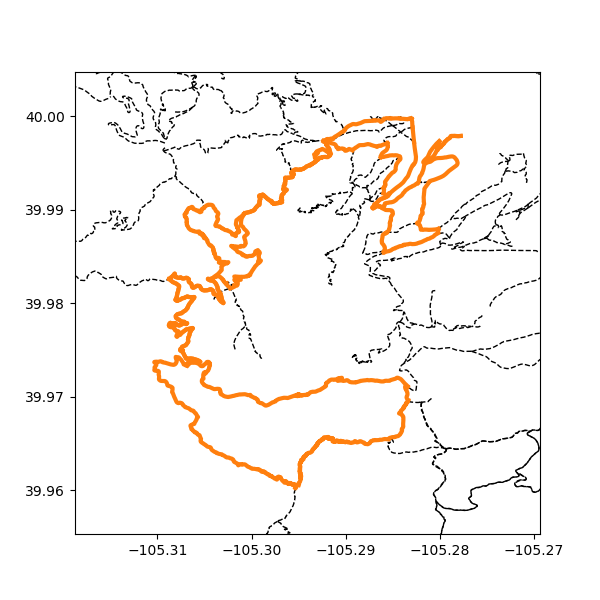

(<Figure size 600x600 with 1 Axes>, <AxesSubplot:>)

In [23]:
plot_trails(TrailMap, nodes=possible_routes)

In [6]:
def plot(graph, node_order=None,
         weight='distance', zoom =True,
         region = None):
    
    #pos = nx.spring_layout(graph, weight=weight, seed = 12345)
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    
    
    pos = {ni : np.array([n['long'],n['lat']]) for ni,n in graph.nodes(data=True)}
    
    pc = nx.draw_networkx_nodes(graph, pos, node_size=20, ax = ax)


    #edges = [(u,v)]
    etraveled = [(u,v) for (u,v,d) in graph.edges(data=True) if d['traversed_count'] > 0]
    enottraveled = [(u,v) for (u,v,d) in graph.edges(data=True) if d['traversed_count'] == 0]

    colors = 'black'
    if not (node_order is None):
        ecolor_int = [node_order.index(e[0]) for e in etraveled]
        #colors = magma((np.array(ecolor_int)+5) / ((1.0*len(node_order)+5)))
        colors = ["C%i"%i for i in ecolor_int]
        
    temp = nx.draw_networkx_edges(graph, pos, edgelist=etraveled, width=2, edge_color=colors, ax = ax)
    temp = nx.draw_networkx_edges(graph, pos, edgelist=enottraveled, width=2, style='dashed', ax = ax)
    
    

    travelled_edges = graph.edges_from_nodes(node_order)
    travelled_edges_counter = {x : 0 for x in np.unique(travelled_edges)}
    
    edge_labels = {}
    count = 0
    for (u,v,d) in graph.edges(data=True):
        
        if not((u,v) in edge_labels.keys()):
            edge_labels[(u,v)] = ''
    
    count = 1
    for (u,v) in travelled_edges:
        try:
            edge_labels[(u,v)] = edge_labels[(u,v)] + '%i '%(count)
        except:
            edge_labels[(v,u)] = edge_labels[(v,u)] + '%i '%(count)
            
        count = count + 1

    #try:
    #    edge_labels = { (u,v) : "%i"%(d['ShapeLen']) for (u,v,d) in graph.edges(data=True)}
    #except:    
    #    edge_labels = { (u,v) : "%i"%(d['SHAPESTLength']) for (u,v,d) in graph.edges(data=True)}
    temp = nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, label_pos=0.5, ax = ax)
    
    temp = nx.draw_networkx_labels(graph, pos, labels={n:n for n,data in graph.nodes(data=True)}, font_size=17,
                            font_color = 'black')
    
    
    chataqua = (-105.2795, 39.9972)
    ax.scatter(chataqua[0], chataqua[1], color = 'black', marker = '*', s = 200)
    
    start_point = graph.nodes[node_order[0]]
    ax.scatter(chataqua[0], chataqua[1], color = 'black', marker = '*', s = 200)


    sep = 0.025
    if zoom:
        ax.set_ylim( chataqua[1] - sep, chataqua[1]+sep)
        ax.set_xlim( chataqua[0] - sep, chataqua[0]+sep)
        
    #print(pos)
    return pc,ax

<IPython.core.display.Javascript object>


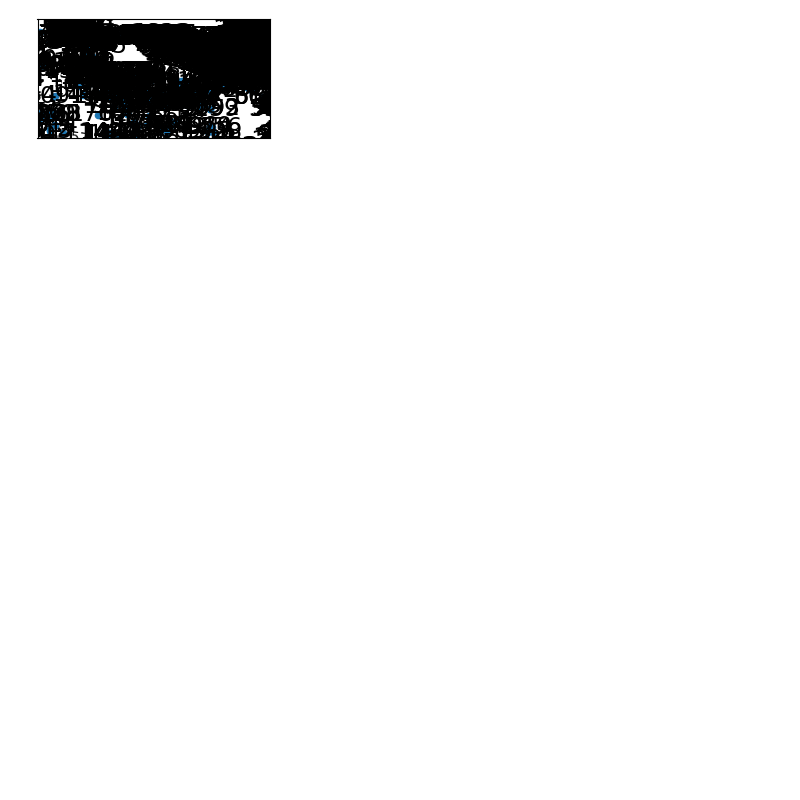

(<matplotlib.collections.PathCollection at 0x7f6443c85990>, <AxesSubplot:>)

In [7]:
plot(TrailMap,node_order=possible_routes)

In [9]:
x = TrailMap.edges_from_nodes(possible_routes)
print(x)

[(1041, 1040), (1040, 1035), (1035, 1034), (1034, 1009), (1009, 1008), (1008, 1431), (1431, 1214), (1214, 1215), (1215, 1348), (1348, 1274), (1274, 1338), (1338, 1339), (1339, 1381), (1381, 1380), (1380, 1389), (1389, 1093), (1093, 1396), (1396, 1399), (1399, 1398), (1398, 1444), (1444, 1449), (1449, 1106), (1106, 1439), (1439, 819), (819, 818), (818, 820), (820, 958), (958, 959), (959, 802), (802, 910), (910, 914), (914, 803), (803, 917), (917, 1123), (1123, 1854), (1854, 1123), (1123, 917), (917, 803), (803, 802), (802, 959), (959, 958), (958, 820), (820, 818), (818, 819), (819, 1439), (1439, 1106), (1106, 1449), (1449, 1444), (1444, 1398), (1398, 1399), (1399, 953), (953, 952), (952, 954), (954, 956), (956, 1264), (1264, 1270), (1270, 1021), (1021, 971), (971, 978), (978, 1425), (1425, 1073), (1073, 1056), (1056, 926), (926, 967), (967, 1011), (1011, 1326), (1326, 1495), (1495, 1035), (1035, 1038), (1038, 1040), (1040, 1041)]


<IPython.core.display.Javascript object>


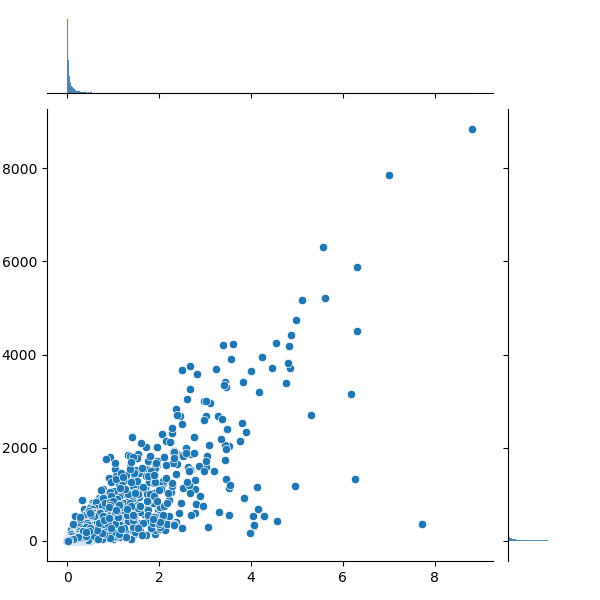

In [14]:
import seaborn as sns
edge_list = list(TrailMap.edges)
d   = TrailMap.reduce_edge_data('distance',function=None)        * 0.000621371
e_g = TrailMap.reduce_edge_data('elevation_gain', function=None) * 3.28084
e_l = TrailMap.reduce_edge_data('elevation_loss',function=None) * 3.28084

sns.jointplot(x=d,y=e_g+e_l)

In [ ]:
select = np.where( e_g + e_l > 6000)

for i in select[0]:
    u,v = edge_list[i]

    print("====================================")
    print(u,v)    
    for k in TrailMap.edges[(u,v)].keys():
        if k == 'geometry':
            continue
        print(k, TrailMap.edges[(u,v)][k])


In [ ]:
try:
    print(nx.shortest_path(TrailMap, 0, 1))
except nx.NetworkXNoPath:
    print('works')
    

In [10]:
#
# Orphaned segments
#
orphan_list = []
for i in TrailMap.nodes:
    
    neighbors = [n for n in TrailMap.neighbors(i)]
    
    if len(neighbors) > 1:
        continue
        
    other_neighbors = [n for n in TrailMap.neighbors(neighbors[0])]
    
    if len(other_neighbors) > 1:
        continue
        
    if (other_neighbors[0] == i):
        if (neighbors[0],i) in orphan_list:
            continue
            
        orphan_list.append((i,neighbors[0]))
    
print("Number of Orphaned Segments: ", len(orphan_list))
print("Comprising a total distance of %.3f mi of trail "%(TrailMap.reduce_edge_data('distance',edges=orphan_list)*0.00062137))
#print(orphan_list)

Number of Orphaned Segments:  844
Comprising a total distance of 284.230 mi of trail 


In [ ]:
[n for n in TrailMap.neighbors(0)]

In [4]:
for u in TrailMap._adj:
    for v in TrailMap._adj[u]:
        if not ('test' in TrailMap._adj[u][v].keys()):
            TrailMap._adj[u][v]['test'] = 0
            
        TrailMap._adj[u][v]['test'] = np.random.rand()*-1

In [8]:
test_nodes = nx.shortest_path(TrailMap, 1041, 1762)
test_edges = TrailMap.edges_from_nodes(test_nodes)
print(test_nodes)
print(test_edges)

[1041, 22503, 22501, 22500, 22486, 22485, 22650, 22582, 22665, 1762]
[(1041, 22503), (22503, 22501), (22501, 22500), (22500, 22486), (22486, 22485), (22485, 22650), (22650, 22582), (22582, 22665), (22665, 1762)]


In [19]:
route_line = TrailMap.reduce_edge_data('geometry', 
                          edges = test_edges,
                          function = gpx_process.combine_gpx)
full_route_line = TrailMap.reduce_edge_data('geometry', 
                          edges = test_edges,
                          function = None)

In [20]:
route_totals = TrailMap.route_properties(edges=test_edges)

Distance (mi)  Elev. + (ft)  Elev. - (ft) Min Elev. (ft) Max Elev. (ft) Min Grade (%) Max Grade (%)  Repeated (%)
         2.16           402           114          5649          6948         -0.00          0.00          0.00


In [13]:
full_route_line[6].coords[:67]

[(-105.28597123450189, 39.991759961468524, 1844.0),
 (-105.28598527516979, 39.99176555542177, 1844.2453284389674),
 (-105.2859990759875, 39.991769768780465, 1844.4756281025911),
 (-105.2860106022709, 39.99177254855098, 1844.6629510947544),
 (-105.28602444441114, 39.99177507229893, 1844.8835232603233),
 (-105.28603928457962, 39.99177824642628, 1845.1223711059417),
 (-105.28605348514763, 39.99178026776443, 1845.3462742201111),
 (-105.28606757432453, 39.9917823668728, 1845.5687748433395),
 (-105.28608144790577, 39.99178408676519, 1845.7866391742702),
 (-105.28609555145574, 39.99178534141248, 1846.006740068622),
 (-105.2861094016808, 39.99178654513062, 1846.222822044263),
 (-105.28612453470008, 39.991787195510035, 1846.4577815564542),
 (-105.28613867508098, 39.991787344856434, 1846.677005288532),
 (-105.2861521480136, 39.991786588489276, 1846.8864214385492),
 (-105.28616554009785, 39.99178491195559, 1847.0967775879017),
 (-105.28617955920618, 39.991782931911494, 1847.2941601555922),
 (-105

In [14]:
full_route_line[6].coords[0:5]

[(-105.28597123450189, 39.991759961468524, 1844.0),
 (-105.28598527516979, 39.99176555542177, 1844.2453284389674),
 (-105.2859990759875, 39.991769768780465, 1844.4756281025911),
 (-105.2860106022709, 39.99177254855098, 1844.6629510947544),
 (-105.28602444441114, 39.99177507229893, 1844.8835232603233)]

In [15]:
full_route_line[6].coords[-5:]

[(-105.28744279081997, 39.99101534218563, 1865.127341729097),
 (-105.2874457148362, 39.99102551230693, 1865.2774583465955),
 (-105.287449358403, 39.991038189684126, 1865.4645803311323),
 (-105.28745757619122, 39.99104879821066, 1865.6424057408747),
 (-105.2874866510637, 39.99105971575509, 1866.0)]

In [7]:
print(TrailMap._adj[1478][1762]['elevation_gain'],TrailMap._adj[1478][1762]['elevation_loss'])

337.0 337.0


In [8]:
e = np.array([float(x) for x in TrailMap._adj[1478][1762]['elevations'].split(',')])
dz = e[1:]-e[:-1]
print(np.sum(dz[dz>0]))
print(np.abs(np.sum(dz[dz<0])))

337.0
337.0


In [21]:
print(route_line.coords[0])
print(route_line.coords[-1])
print(full_route_line[0].coords[0],full_route_line[0].coords[-1])
print(full_route_line[-1].coords[0],full_route_line[-1].coords[-1])

(-105.2862961102244, 39.99031430286024, 1849.0)
(-105.28629641924485, 39.99031449143994, 1849.0)
(-105.27776961326293, 39.9978972217264, 1722.0) (-105.28019009145665, 39.996549851558896, 1746.0)
(-105.28861429096851, 39.989223288390164, 1915.0) (-105.29143487250157, 39.98197670399417, 2118.0)


<IPython.core.display.Javascript object>


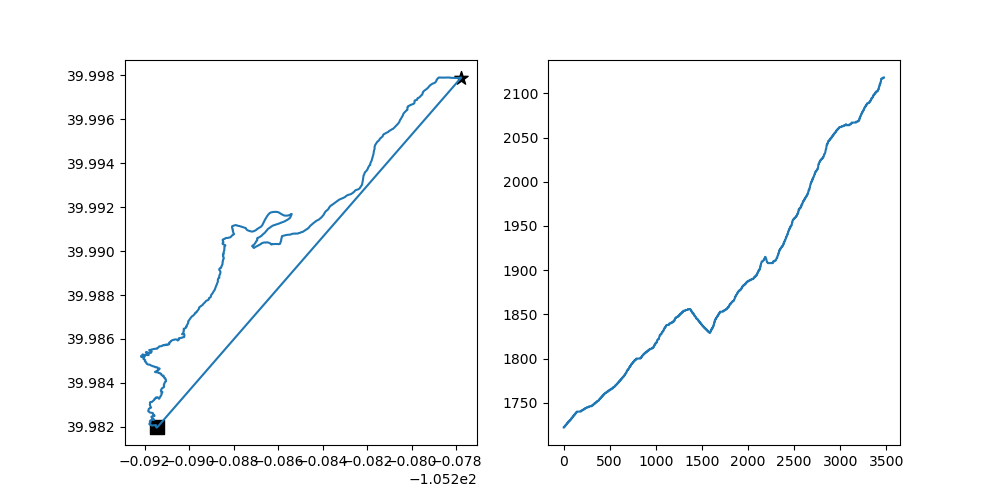

In [11]:
fig, all_ax = plt.subplots(1,2)
fig.set_size_inches(10,5)

ax = all_ax[0]

long, lat = route_line.coords.xy
ax.plot(long, lat)
#ax.plot([c[0] for c in x[1].coords], [c[1] for c in x[1].coords])

s = TrailMap.nodes[test_nodes[0]]
e = TrailMap.nodes[test_nodes[-1]]

ax.scatter(s['long'],s['lat'], s = 100, marker='*', color = 'black')
ax.scatter(e['long'],e['lat'], s = 100, marker='s', color = 'black')


ax = all_ax[1]

d   = TrailMap.reduce_edge_data('distance', edges = test_edges,function=None)        * 0.000621371
e_g = TrailMap.reduce_edge_data('elevation_gain',  edges = test_edges, function=None) * 3.28084
e_l = TrailMap.reduce_edge_data('elevation_loss', edges = test_edges,function=None) * 3.28084


#a = TrailMap.reduce_edge_data('elevations', edges=test_edges,function=None)
#alts = np.array([float(y) for sublist in a for y in sublist.split(',')])
#d = TrailMap.reduce_edge_data('distances', edges=test_edges,function=None)
#dists = np.array([float(y) for sublist in d for y in sublist.split(',')])

dists = TrailMap.reduce_edge_data('distances',edges=test_edges,function=None)
alts = TrailMap.reduce_edge_data('elevations',edges=test_edges,function=None)

e   = e_g + e_l
ax.plot( np.cumsum(dists), alts[:-9])

In [31]:
d[0]

'1.800E+00,2.279E+00,1.462E+00,1.247E+00,2.207E+00,1.581E+00,1.194E+00,1.662E+00,1.575E+00,1.651E+00,1.494E+00,2.478E+00,2.632E+00,1.862E+00,1.932E+00,1.582E+00,1.536E+00,1.925E+00,1.952E+00,2.306E+00,1.732E+00,1.461E+00,1.551E+00,1.359E+00,1.425E+00,1.325E+00,2.528E+00,1.473E+00,1.084E+00,1.551E+00,1.510E+00,2.279E+00,1.235E+00,1.779E+00,1.303E+00,1.571E+00,1.717E+00,1.191E+00,2.780E+00,7.427E-01,4.297E+00,2.090E+00,1.324E+00,2.174E+00,3.546E+00,1.597E+00,1.309E+00,1.443E+00,1.234E+00,3.101E+00,1.610E+00,1.157E+00,2.160E+00,1.195E+00,1.883E+00,1.817E+00,1.544E+00,2.179E+00,1.468E+00,1.992E+00,1.421E+00,2.454E+00,1.617E+00,1.533E+00,2.180E+00,1.120E+00,5.114E+00,1.662E+00,1.742E+00,1.518E+00,3.000E+00,1.404E+00,1.451E+00,1.519E+00,3.028E+00,1.514E+00,1.569E+00,1.419E+00,2.697E+00,1.671E+00,1.601E+00,1.555E+00,1.464E+00,1.564E+00,5.249E+00,1.538E+00,1.574E+00,1.464E+00,2.500E+00,1.379E+00,1.388E+00,1.546E+00,1.689E+00,1.399E+00,1.396E+00,1.536E+00,1.351E+00,1.354E+00,1.734E+00,1.519E+00

In [21]:
y = shapely.geometry.LineString([(0,0,0),(1,1,1)])

In [17]:
np.shape(d)

(9,)

In [32]:
y.coords

In [7]:
gpx = gpxpy.gpx.GPX()
gpx_track = gpxpy.gpx.GPXTrack()
gpx.tracks.append(gpx_track)
gpx_segment = gpxpy.gpx.GPXTrackSegment()
gpx_track.segments.append(gpx_segment)
gpx_segment.points.extend( [gpxpy.gpx.GPXTrackPoint(x[1],x[0], elevation=x[2]) for x in route_line.coords])


with open('test.xml','w') as f:
    f.write(gpx.to_xml())

In [26]:
#
# load the pickled traip map
#
outname = './data/small_trails_processed'
small_df, small_nodes, small_edges = gpx_process.load_trail_df(outname)
TrailSmall             = gpx_process.load_graph(outname)

In [27]:
temp = TrailSmall._adj[0][0]['geometry']

In [3]:
def plot_trails(trailmap, nodes = None, edges = None,
                ll = None, rr = None):
    """
    Plot all trails in trailmap in the region selected
    """

    fig,ax = plt.subplots()
    fig.set_size_inches(6,6)
    
    if (edges is None) and (not (nodes is None)):
        edges = trailmap.edges_from_nodes(nodes)
    
    
    if not (edges is None):
        if (ll is None) and (rr is None):
        
            min_long, max_long = 9999, -10000
            min_lat, max_lat = 9999, -10000
        
            for (u,v) in edges:
                long = [c[0] for c in trailmap.edges[(u,v)]['geometry'].coords]
                lat  = [c[1] for c in trailmap.edges[(u,v)]['geometry'].coords]

                min_long = np.min([min_long,np.min(long)])
                max_long = np.max([max_long,np.max(long)])
                min_lat  = np.min([min_lat,np.min(lat)])
                max_lat  = np.max([max_lat,np.max(lat)])
            
            dlong = (max_long-min_long)
            dlat  = (max_lat-min_lat)
        
            if dlong < dlat:
                d = dlat - dlong
                min_long = min_long - 0.5*d
                max_long = max_long + 0.5*d
            else:
                d = dlong - dlat
                min_lat = min_lat - 0.5*d
                max_lat = max_lat + 0.5*d
                
            # now expand both by 25%
            dlong = (max_long-min_long)*0.25
            dlat  = (max_lat-min_lat)*0.25
            min_long = min_long - 0.5*dlong
            max_long = max_long + 0.5*dlong        
            min_lat = min_lat - 0.5*dlat
            max_lat = max_lat + 0.5*dlat                 
            
            ll = (min_long,min_lat)
            rr = (max_long,max_lat)
        
    if ll is None:
        ll = (-np.inf,-np.inf)
        rr = (np.inf,np.inf)
        
    for (u,v,d) in trailmap.edges(data=True):

        long = [c[0] for c in d['geometry'].coords]
        lat  = [c[1] for c in d['geometry'].coords]

        if all(long<ll[0]) or all(long>rr[0]) or all(lat<ll[1]) or all(lat>rr[1]):
            continue

        ax.plot(long, lat, lw = 1, ls = '--', color = 'black')
        
    if not (edges is None):
        for (u,v) in edges:
            long = [c[0] for c in trailmap.edges[(u,v)]['geometry'].coords]
            lat  = [c[1] for c in trailmap.edges[(u,v)]['geometry'].coords]
            
            ax.plot(long,lat,lw=3,ls='-',color='C1')
        
        
    ax.set_xlim(ll[0],rr[0])
    ax.set_ylim(ll[1],rr[1])

    return fig, ax

<IPython.core.display.Javascript object>


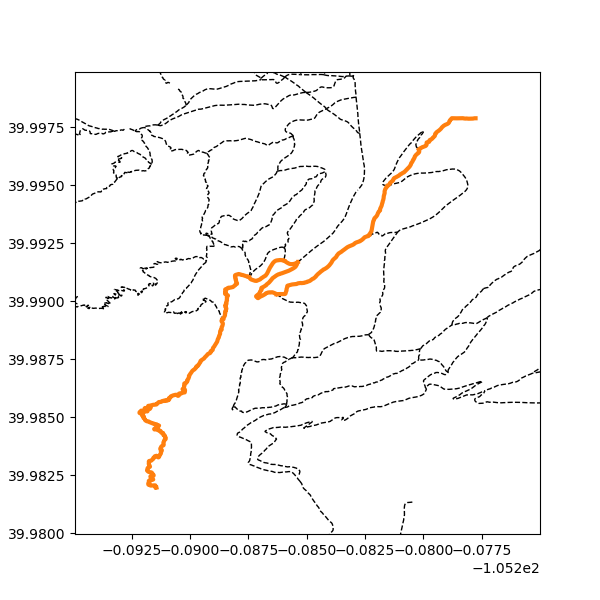

In [12]:
fig, ax = plot_trails(TrailMap, edges=test_edges)